<a href="https://colab.research.google.com/github/Venni2911/LogicMojo-AI-ML-Sept25-VenniRaj/blob/main/ROC_AUC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ROC-AUC

---


**Agenda**

* Introduction
* What is the AUC-ROC curve?
* Key terms used
* Relationship between Sensitivity, Specificity, FPR, and Threshold.
* How does AUC-ROC work?
* Use case of ROC-AUC
* Estimating the model's performance
* Understanding the AUC-ROC Curve
* Implementation using Logistic Regression
* How to use ROC-AUC for a multi-class model?
* Conclusion

# Introduction

Understanding how well a model works is a big deal in Machine Learning. To do that, we use performance metrics which give us an idea of how good a model is. You've probably heard of some of these metrics in your previous lectures like accuracy, precision, recall, and AUC-ROC. These are mainly used for sorting things into categories. In this colab file, we'll dive into one of these metrics: **the AUC-ROC curve**.

# What is the AUC-ROC curve?

The AUC-ROC curve, or Area Under the Receiver Operating Characteristic curve, is a graphical representation of the performance of a binary classification model at various classification thresholds. It is commonly used in machine learning to assess the ability of a model to distinguish between two classes, typically the positive class (e.g., presence of a disease) and the negative class (e.g., absence of a disease).

Let’s first understand the meaning of the two terms **ROC** and **AUC**.

* **ROC**: Receiver Operating Characteristics
* **AUC**: Area Under Curve

## Receiver Operating Characteristics (ROC) Curve

ROC stands for Receiver Operating Characteristics, and the ROC curve is the graphical representation of the effectiveness of the binary classification model. It plots the true positive rate (TPR) vs the false positive rate (FPR) at different classification thresholds.

## Area Under Curve (AUC) Curve:

AUC stands for the Area Under the Curve, and the AUC curve represents the area under the ROC curve. It measures the overall performance of the binary classification model. As both TPR and FPR range between 0 to 1, So, the area will always lie between 0 and 1, and A greater value of AUC denotes better model performance. Our main goal is to maximize this area in order to have the highest TPR and lowest FPR at the given threshold. The AUC measures the probability that the model will assign a randomly chosen positive instance a higher predicted probability compared to a randomly chosen negative instance.

It represents the probability with which our model can distinguish between the two classes present in our target.

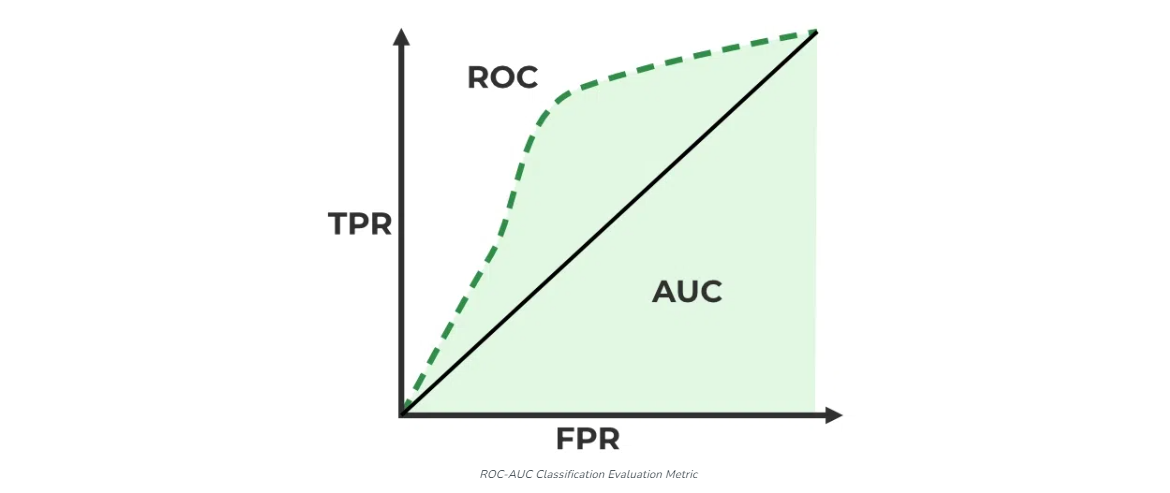

# Key Terms Used

## TPR and FPR

This is the most common definition that you would have encountered when you would Google AUC-ROC. Basically, the ROC curve is a graph that shows the performance of a classification model at all possible thresholds (threshold is a particular value beyond which you say a point belongs to a particular class). The curve is plotted between two parameters

* TPR – True Positive Rate
* FPR – False Positive Rate

Before understanding, TPR and FPR let us quickly look at the confusion matrix.

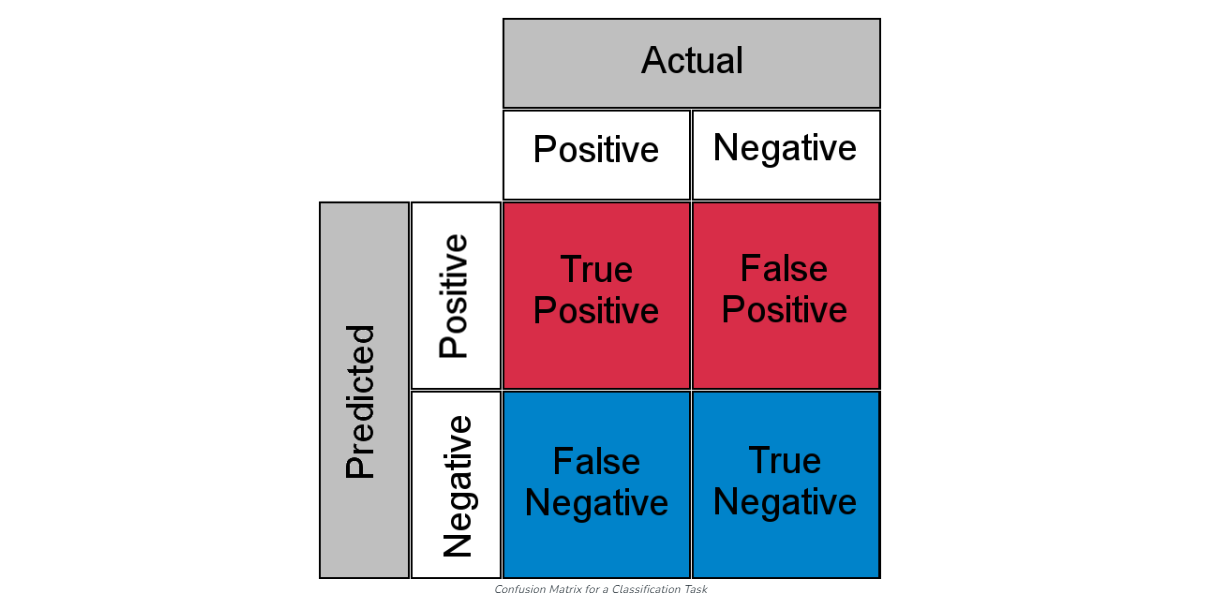

* **True Positive**: Actual Positive and Predicted as Positive
* **True Negative**: Actual Negative and Predicted as Negative
* **False Positive(Type I Error)**: Actual Negative but predicted as Positive
* **False Negative(Type II Error)**: Actual Positive but predicted as Negative

In simple terms, you can call False Positive a false alarm and False Negative a miss. Now let us look at what TPR and FPR are.

## Sensitivity / True Positive Rate / Recall

Basically, TPR/Recall/Sensitivity is the ratio of positive examples that are correctly identified.  It represents the ability of the model to correctly identify positive instances and is calculated as follows:

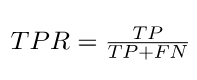

Sensitivity/Recall/TPR measures the proportion of actual positive instances that are correctly identified by the model as positive.

## False Positive Rate

FPR is the ratio of negative examples that are incorrectly classified.

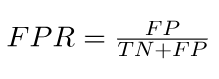

## Specificity

Specificity measures the proportion of actual negative instances that are correctly identified by the model as negative. It represents the ability of the model to correctly identify negative instances

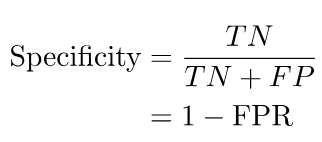

And as said earlier ROC is nothing but the plot between TPR and FPR across all possible thresholds and AUC is the entire area beneath this ROC curve.

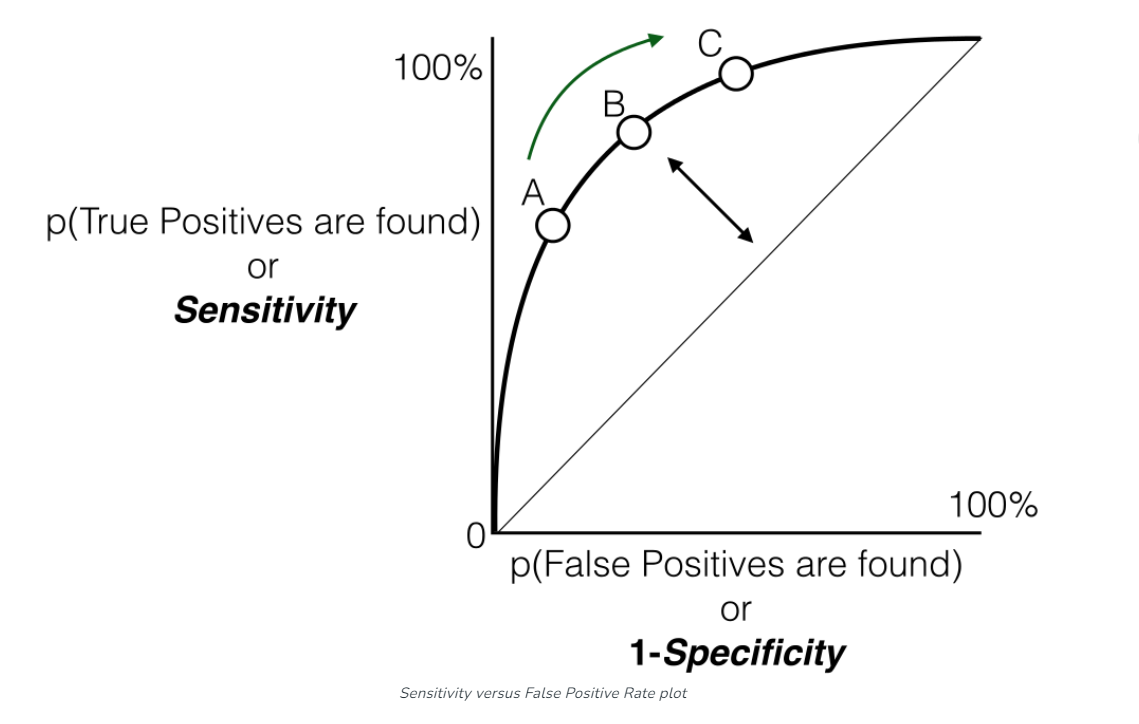

# Relationship between Sensitivity, Specificity, FPR, and Threshold

## Sensitivity and Specificity:

* **Inverse Relationship**:  sensitivity and specificity have an inverse relationship. When one increases, the other tends to decrease. This reflects the inherent trade-off between true positive and true negative rates.
* **Tuning via Threshold**: By adjusting the threshold value, we can control the balance between sensitivity and specificity. Lower thresholds lead to higher sensitivity (more true positives) at the expense of specificity (more false positives). Conversely, raising the threshold boosts specificity (fewer false positives) but sacrifices sensitivity (more false negatives).

## Threshold and False Positive Rate (FPR):

* **FPR and Specificity Connection**: False Positive Rate (FPR) is simply the complement of specificity (FPR = 1 – specificity). This signifies the direct relationship between them: higher specificity translates to lower FPR, and vice versa.
* **FPR Changes with TPR**: Similarly, as you observed, the True Positive Rate (TPR) and FPR are also linked. An increase in TPR (more true positives) generally leads to a rise in FPR (more false positives). Conversely, a drop in TPR (fewer true positives) results in a decline in FPR (fewer false positives).

# How does AUC-ROC work?

Let us look at AUC-ROC from a probabilistic point of view. Let us first talk about what AUC does and later we will build our understanding on top of this

**AUC measures how well a model is able to distinguish between classes.**

An AUC of 0.75 would actually mean that let’s say we take two data points belonging to separate classes then there is a 75% chance the model would be able to segregate them or rank order them correctly i.e positive point has a higher prediction probability than the negative class. (assuming a higher prediction probability means the point would ideally belong to the positive class). Here is a small example to make things more clear.

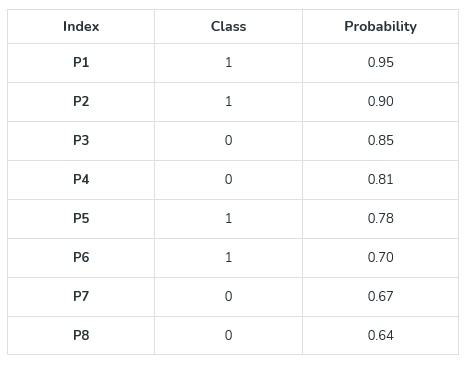

Here we have 8 points where P1, P2, P5, and P6 belong to class 1 and P3, P4, P7, and P8 belong to class 0 and we’re corresponding predicted probabilities in the Probability column, as we said if we take two points belonging to separate classes then what is the probability that model rank orders them correctly.

We will take all possible pairs such that one point belongs to class 1 and the other belongs to class 0, we will have a total of 16 such pairs.

Below are all of these 16 possible pairs.

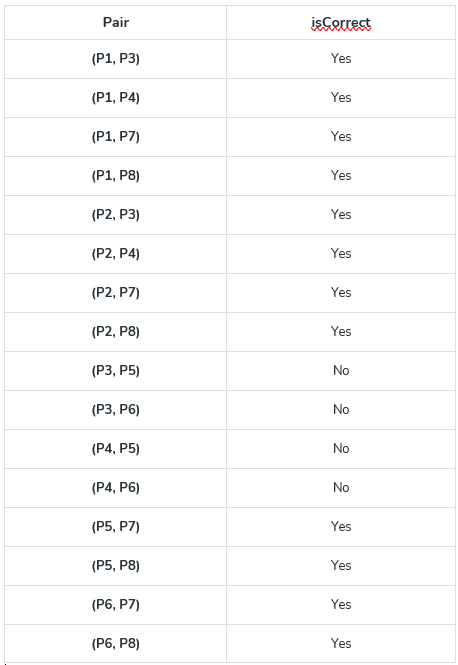

Here, the column **isCorrect** tells if the mentioned pair is correctly rank-ordered based on the predicted probability, i.e., class 1 point has a higher probability than class 0 point, in 12 out of these 16 possible pairs class 1 is ranked higher than class 0, or we can say that there is a 75% chance that if you pick a pair of points belonging to separate classes the model would be able to distinguish them correctly.

Now, you might have a bit of intuition behind this AUC number, just to clear up any further doubts let’s validate it using Scikit learns AUC-ROC implementation.

## AUC-ROC implementation

In [ ]:
import numpy as np
from sklearn .metrics import roc_auc_score

y_true = [1, 1, 0, 0, 1, 1, 0, 0]
y_pred = [0.95, 0.90, 0.85, 0.81, 0.78, 0.70, 0.67, 0.64]
auc = np.round(roc_auc_score(y_true, y_pred), 3)
print("Auc for our sample data is {}".format(auc))

Auc for our sample data is 0.75


# Use case of AUC-ROC

There are some areas where using ROC-AUC might not be ideal. In cases where the dataset is highly imbalanced, the ROC curve can give an overly optimistic assessment of the model’s performance. This optimism bias arises because the ROC curve’s false positive rate (FPR) can become very small when the number of actual negatives is large.

Looking at the FPR formula,

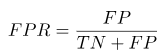

We observe that -

* The Negative class is in the majority, the denominator of FPR is dominated by True Negatives, because of which FPR becomes less sensitive to changes in predictions related to the minority class (positive class).
* ROC curves may be appropriate when the cost of False Positives and False Negatives is balanced and the dataset is not heavily imbalanced.

In those case, Precision-Recall Curves can be used which provide an alternative evaluation metric that is more suitable for imbalanced datasets, focusing on the performance of the classifier with respect to the positive (minority) class.

# Estimating the model's performance

* A high AUC (close to 1) indicates excellent discriminative power. This means the model is effective in distinguishing between the two classes, and its predictions are reliable.
* A low AUC (close to 0) suggests poor performance. In this case, the model struggles to differentiate between the positive and negative classes, and its predictions may not be trustworthy.
* AUC around 0.5 implies that the model is essentially making random guesses. It shows no ability to separate the classes, indicating that the model is not learning any meaningful patterns from the data.

# Understanding the AUC-ROC Curve

In an ROC curve, the x-axis typically represents the False Positive Rate (FPR), and the y-axis represents the True Positive Rate (TPR), also known as Sensitivity or Recall.

So, a higher x-axis value (towards the right) on the ROC curve does indicate a higher False Positive Rate, and a higher y-axis value (towards the top) indicates a higher True Positive Rate.

The ROC curve is a graphical representation of the trade-off between true positive rate and false positive rate at various thresholds. It shows the performance of a classification model at different classification thresholds.

The AUC (Area Under the Curve) is a summary measure of the ROC curve performance.The choice of the threshold depends on the specific requirements of the problem you’re trying to solve and the trade-off between false positives and false negatives that is acceptable in your context.

* If you want to prioritize reducing false positives (minimizing the chances of labeling something as positive when it’s not), you might choose a threshold that results in a lower false positive rate.
* If you want to prioritize increasing true positives (capturing as many actual positives as possible), you might choose a threshold that results in a higher true positive rate.

Let’s consider an example to illustrate how ROC curves are generated for different thresholds and how a particular threshold corresponds to a confusion matrix. Suppose we have a binary classification problem with a model predicting whether an email is spam (positive) or not spam (negative).

Let us consider the hypothetical data -

* True Labels: [1, 0, 1, 0, 1, 1, 0, 0, 1, 0]

* Predicted Probabilities: [0.8, 0.3, 0.6, 0.2, 0.7, 0.9, 0.4, 0.1, 0.75, 0.55]

## Case 1: Threshold = 0.5

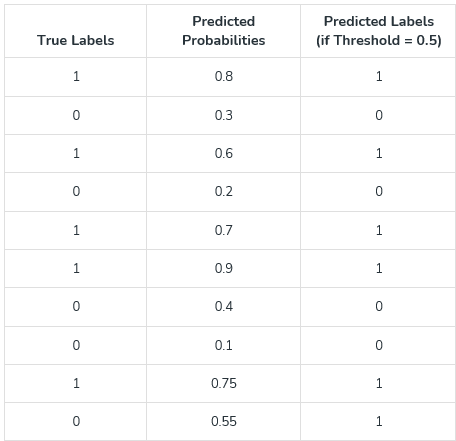

Confusion matrix based on above predictions -

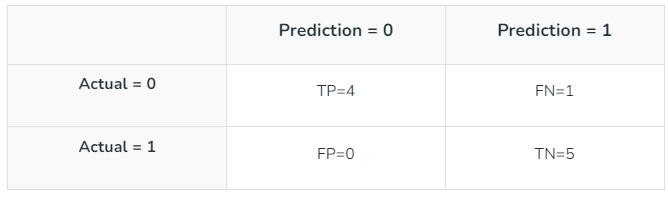

Accordingly,

* True Positive Rate (TPR):
Proportion of actual positives correctly identified by the classifier is
\begin{aligned} TPR &= \frac{TP}{TP + FN}  \\&= \frac{4}{4+ 1}  \\&= 0.8 \end{aligned}
* False Positive Rate (FPR):
Proportion of actual negatives incorrectly classified as positives
\begin{aligned} FPR &= \frac{FP}{FP + TN}  \\&= \frac{0}{0 + 5}  \\&= 0 \end{aligned}

So, at the threshold of 0.5:

* True Positive Rate (Sensitivity): 0.8
* False Positive Rate: 0

The interpretation is that the model, at this threshold, correctly identifies 80% of actual positives (TPR) but incorrectly classifies 0% of actual negatives as positives (FPR).

## Case 2: Threshold = 0.7

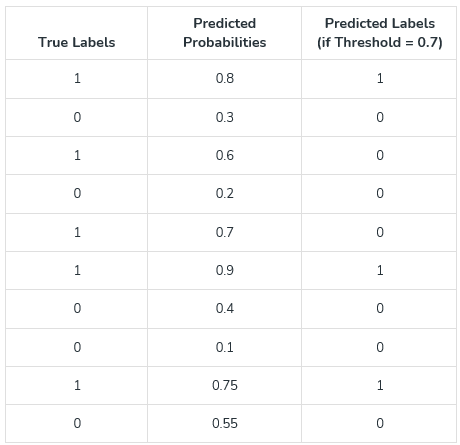

Confusion matrix based on above predictions:

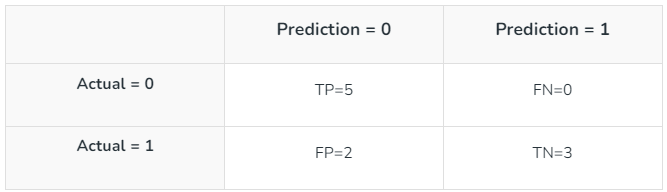

Accordingly,

* True Positive Rate (TPR):
Proportion of actual positives correctly identified by the classifier is
\begin{aligned} TPR &= \frac{TP}{TP + FN}  \\&= \frac{5}{5+ 0}  \\&= 1.0 \end{aligned}
* False Positive Rate (FPR):
Proportion of actual negatives incorrectly classified as positives
\begin{aligned} FPR &= \frac{FP}{FP + TN}  \\&= \frac{1}{1+ 4}  \\&= 0.2 \end{aligned}

## Case 3: Threshold = 0.4

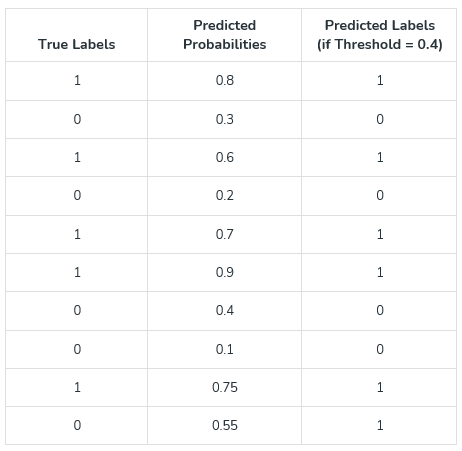

Confusion matrix based on above predictions:

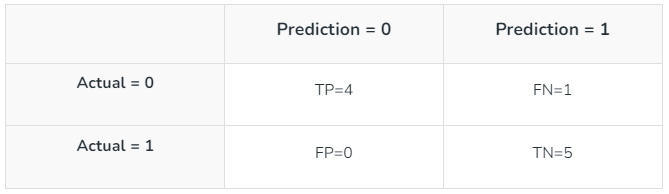

Accordingly,

* True Positive Rate (TPR):
Proportion of actual positives correctly identified by the classifier is
\begin{aligned} TPR &= \frac{TP}{TP + FN}  \\&= \frac{4}{4+ 1}  \\&= 0.8 \end{aligned}
* False Positive Rate (FPR):
Proportion of actual negatives incorrectly classified as positives
\begin{aligned} FPR &= \frac{FP}{FP + TN}  \\&= \frac{0}{0 + 5}  \\&= 0 \end{aligned}

## Case 4: Threshold = 0.2

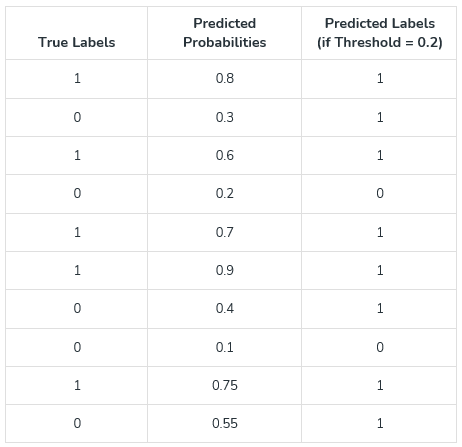

Confusion matrix based on above predictions:

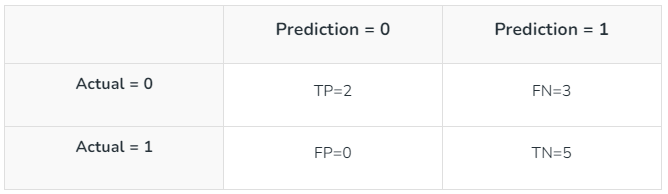

Accordingly,

* True Positive Rate (TPR):
Proportion of actual positives correctly identified by the classifier is
\begin{aligned} TPR &= \frac{TP}{TP + FN}  \\&= \frac{2}{2+ 3}  \\&= 0.4 \end{aligned}
* False Positive Rate (FPR):
Proportion of actual negatives incorrectly classified as positives
\begin{aligned} FPR &= \frac{FP}{FP + TN}  \\&= \frac{0}{0 + 5}  \\&= 0 \end{aligned}

## Case 5: Threshold = 0.85

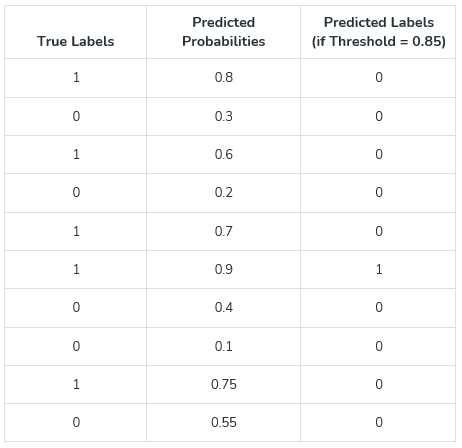

Confusion matrix based on above predictions:

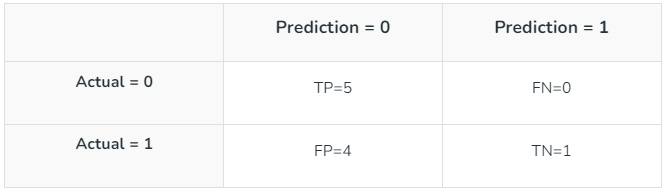

Accordingly,

* True Positive Rate (TPR):
Proportion of actual positives correctly identified by the classifier is
\begin{aligned} TPR &= \frac{TP}{TP + FN}  \\&= \frac{5}{5+ 0}  \\&= 1.0 \end{aligned}
* False Positive Rate (FPR):
Proportion of actual negatives incorrectly classified as positives
\begin{aligned} FPR &= \frac{FP}{FP + TN}  \\&= \frac{4}{4 + 1}  \\&= 0.8 \end{aligned}

Based on the above result, we will plot the ROC curve

## Plotting the ROC curve

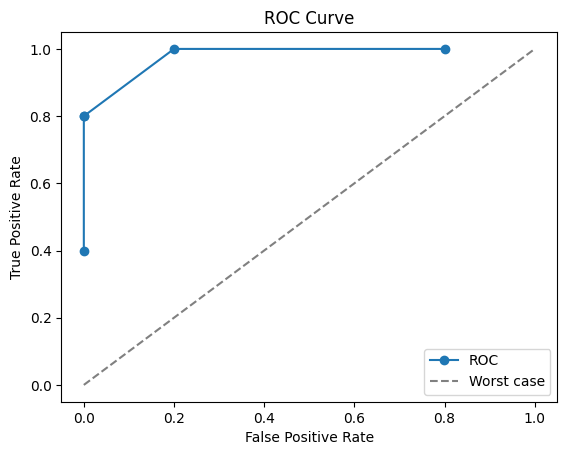

In [ ]:
import matplotlib.pyplot as plt

true_positive_rate = [0.4, 0.8, 0.8, 1.0, 1]
false_positive_rate = [0, 0, 0, 0.2, 0.8]

plt.plot(false_positive_rate, true_positive_rate, 'o-', label='ROC')
plt.plot([0, 1], [0, 1], '--', color='grey', label='Worst case')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

From the graph it is implied that:

* The gray dashed line represents the “Worst case” scenario, where the model’s predictions i.e TPR are FPR are same. This diagonal line is considered the worst-case scenario, indicating an equal likelihood of false positives and false negatives.
* As points deviate from the random guess line towards the upper-left corner, the model’s performance improves.
* The Area Under the Curve (AUC) is a quantitative measure of the model’s discriminative ability. A higher AUC value, closer to 1.0, indicates superior performance. The best possible AUC value is 1.0, corresponding to a model that achieves 100% sensitivity and 100% specificity.

In all, the Receiver Operating Characteristic (ROC) curve serves as a graphical representation of the trade-off between a binary classification model’s True Positive Rate (sensitivity) and False Positive Rate at various decision thresholds.

As the curve gracefully ascends towards the upper-left corner, it signifies the model’s commendable ability to discriminate between positive and negative instances across a range of confidence thresholds. This upward trajectory indicates an improved performance, with higher sensitivity achieved while minimizing false positives.

# Implementation using Logistic Regression

In [ ]:
# Importing the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc

In order to train the Logistic Regression model and to present its ROC curve with AUC score, the algorithm creates artificial binary classification data.

**Generating data and splitting data**

In [ ]:
# Generate synthetic data for demonstration
X, y = make_classification(
	n_samples=1000, n_features=20, n_classes=2, random_state=42)

In [ ]:
# Let's look at the values of X
X

array([[-0.6693561 , -1.49577819, -0.87076638, ..., -1.26733697,
        -1.2763343 ,  1.01664321],
       [ 0.09337237,  0.78584826,  0.10575379, ..., -0.12270893,
         0.6934308 ,  0.91136272],
       [-0.90579721, -0.60834121,  0.29514098, ...,  0.83049813,
        -0.73733198, -0.5782121 ],
       ...,
       [-0.20013455, -1.46108168,  1.79701652, ..., -1.50280171,
        -1.27473745,  1.60111869],
       [ 0.03935575,  0.24868361, -0.47532342, ...,  0.09912579,
         0.54269228,  1.20827474],
       [ 0.76921528,  0.47076539,  0.16994471, ...,  0.6561162 ,
         0.64333186, -2.02100232]])

In [ ]:
# Let's look at the values of y
y

array([1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
	X, y, test_size=0.2, random_state=42)

Using an 80-20 split ratio, the algorithm creates artificial binary classification data with 20 features, divides it into training and testing sets, and assigns a random seed to ensure reproducibility.

**Training the Logistic Regression Model**

In [ ]:
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, y_train)

LogisticRegression(random_state=42)

Using a fixed random seed to ensure repeatability, the method initializes and trains a logistic regression model on the training set.

**Predictions**

In [ ]:
# Generate predictions
y_pred_logistic = logistic_model.predict_proba(X_test)[:, 1]

Using the test data and a trained Logistic Regression model, the code predicts the positive class’s probability.

**Creating a dataframe**

In [ ]:
# Create a DataFrame
test_df = pd.DataFrame(
	{'True': y_test, 'Predictions': y_pred_logistic})

Using the test data, the code creates a DataFrame called test_df with columns labeled “True", and “Predictions”, adding true labels and predicted probabilities from the Logistic Regression model.

**Plot the ROC Curve for the Logistic Regression Model**

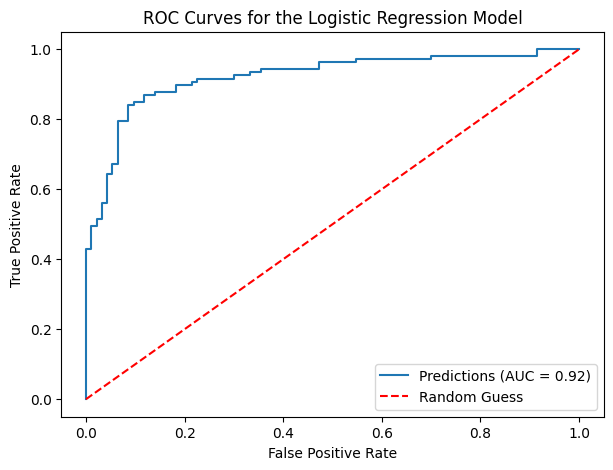

In [ ]:
# Plot ROC curve for each model
plt.figure(figsize=(7, 5))

pred = 'Predictions'

fpr, tpr, _ = roc_curve(test_df['True'], test_df[pred])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'{pred} (AUC = {roc_auc:.2f})')

# Plot random guess line
plt.plot([0, 1], [0, 1], 'r--', label='Random Guess')

# Set labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for the Logistic Regression Model')
plt.legend()
plt.show()

The code computes the AUC and ROC curve for the Logistic Regression model, then plots the ROC curve. The ROC curve for random guessing is also represented by a red dashed line, and labels, a title, and a legend are set for visualization.

# How to use ROC-AUC for a multi-class model?

For a multi-class setting, we can simply use one vs all methodology and you will have one ROC curve for each class. Let’s say you have four classes A, B, C, and D then there would be ROC curves and corresponding AUC values for all the four classes, i.e. once A would be one class and B, C, and D combined would be the others class, similarly, B is one class and A, C, and D combined as others class, etc.

The general steps for using AUC-ROC in the context of a multiclass classification model are:

**One-vs-All Methodology**:
* For each class in your multiclass problem, treat it as the positive class while combining all other classes into the negative class.
* Train the binary classifier for each class against the rest of the classes.

**Calculate AUC-ROC for Each Class**:
* Here we plot the ROC curve for the given class against the rest.
* Plot the ROC curves for each class on the same graph. Each curve represents the discrimination performance of the model for a specific class.
* Examine the AUC scores for each class. A higher AUC score indicates better discrimination for that particular class.

## Implementation of AUC-ROC in Multiclass Classification

In [ ]:
# Importing the libraries

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize        # For binarizing the labels to handle multi-class classification
from sklearn.multiclass import OneVsRestClassifier          # For implementing the One-vs-Rest strategy
from sklearn.linear_model import LogisticRegression         # Base estimator for the OneVsRestClassifier
from sklearn.metrics import roc_curve, auc
from itertools import cycle       # For cycling through colors when plotting ROC curves

The program creates artificial multiclass data, divides it into training and testing sets, and then uses the One-vs-Restclassifier technique to train classifiers for the Logistic Regression model. Lastly, it plots the multiclass ROC curves to demonstrate how well it discriminates between various classes.

**Generating Data and splitting**

In [ ]:
# Generate synthetic multiclass data
X1, y1 = make_classification(
	n_samples=1000, n_features=20, n_classes=3, n_informative=10, random_state=42)

In [ ]:
# Let's look at the values generated in X1
X1

array([[-3.46111994e+00, -1.14411619e+00,  1.52193780e-01, ...,
         1.22463359e-01,  1.47580965e+00,  1.33426915e-01],
       [-7.03000936e-01,  1.80999643e-02,  9.61085968e-01, ...,
        -1.80192268e+00, -1.45041824e+00,  6.26831836e-04],
       [ 6.16415656e-01, -2.84790454e-01,  1.66535881e+00, ...,
        -3.33907452e+00,  1.71941403e-01,  1.08037068e+00],
       ...,
       [ 3.09378814e-01,  3.50499772e-01,  8.62111379e-01, ...,
        -2.35123295e+00,  1.38315717e+00,  6.84657541e-01],
       [-2.47109480e+00,  2.67433035e-01, -8.01856095e-01, ...,
         1.55096629e+00, -5.48649562e-01, -7.58367202e-02],
       [-5.86921906e-01,  8.36898200e-02,  1.06590979e+00, ...,
        -2.76142743e+00, -3.48921726e-01,  1.15339790e-01]])

In [ ]:
# Let's look at the values generated in y1
y1

array([0, 2, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 2, 2, 2, 1, 0, 2, 1, 0, 2,
       1, 2, 1, 2, 1, 2, 0, 2, 0, 1, 1, 1, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2,
       1, 1, 2, 0, 2, 0, 0, 0, 2, 0, 1, 1, 0, 1, 0, 1, 0, 2, 0, 1, 2, 1,
       0, 0, 1, 2, 1, 0, 0, 2, 2, 0, 0, 1, 1, 2, 0, 1, 2, 0, 2, 1, 0, 0,
       2, 2, 0, 2, 0, 0, 2, 2, 2, 1, 0, 2, 1, 2, 2, 1, 1, 1, 0, 0, 2, 2,
       2, 0, 2, 1, 0, 0, 0, 2, 0, 2, 0, 1, 1, 1, 1, 1, 2, 0, 1, 2, 1, 0,
       1, 1, 2, 0, 0, 2, 2, 2, 0, 2, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       2, 2, 0, 0, 1, 0, 0, 1, 1, 0, 2, 0, 2, 2, 1, 2, 0, 1, 0, 1, 2, 1,
       0, 1, 1, 1, 0, 0, 2, 1, 0, 1, 0, 0, 2, 2, 1, 0, 2, 1, 0, 0, 1, 1,
       1, 0, 0, 2, 1, 1, 1, 0, 2, 1, 0, 2, 1, 0, 2, 2, 0, 1, 0, 2, 2, 2,
       1, 1, 2, 2, 1, 0, 1, 2, 1, 1, 0, 1, 2, 1, 2, 2, 0, 0, 1, 1, 1, 0,
       2, 0, 1, 1, 2, 2, 0, 2, 2, 2, 1, 0, 0, 1, 2, 0, 2, 0, 1, 0, 2, 2,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 2, 2, 0, 1, 0, 1, 2, 0, 2, 0, 0, 1,
       2, 0, 0, 2, 2, 2, 0, 1, 0, 1, 1, 2, 0, 1, 0,

In [ ]:
# Binarize the labels
y_bin = label_binarize(y1, classes=np.unique(y1))

In [ ]:
# Split the data into training and testing sets
X_train1, X_test1, y_train1, y_test1 = train_test_split(
	X1, y_bin, test_size=0.2, random_state=42)

Three classes and twenty features make up the synthetic multiclass data produced by the code. After label binarization, the data is divided into training and testing sets in an 80-20 ratio.

**Training the model**

In [ ]:
# Train the multiclass model
logistic_model1 = OneVsRestClassifier(LogisticRegression(random_state=42))
logistic_model1.fit(X_train1, y_train1)

OneVsRestClassifier(estimator=LogisticRegression(random_state=42))

**Plotting the AUC-ROC Curve**

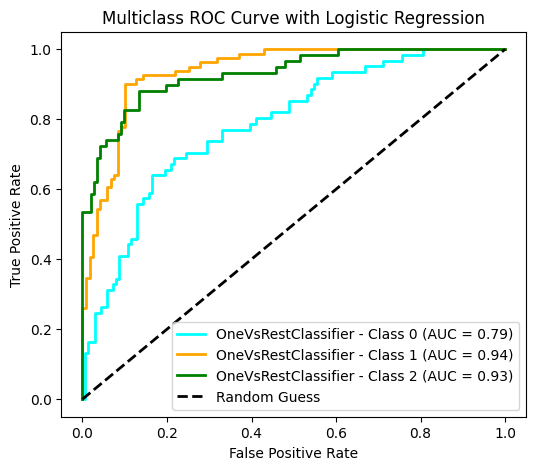

In [ ]:
# Compute ROC curve and ROC area for each class
fpr = dict()  # False Positive Rate
tpr = dict()  # True Positive Rate
roc_auc = dict()  # Area under ROC curve

# Set up plot figure
plt.figure(figsize=(6, 5))

# Set up colors for plotting
colors = ['aqua', 'orange', 'green']    # Take three colors as there are three classes. The color for the curve of each class is different so that they are distinguishable

# Loop through the classes
for i in range(logistic_model1.classes_.shape[0]):

  # Compute ROC curve
	fpr[i], tpr[i], _ = roc_curve(y_test1[:, i], logistic_model1.predict_proba(X_test1)[:, i])

  # Compute AUC
	roc_auc[i] = auc(fpr[i], tpr[i])

  # Plot the ROC curve
	plt.plot(fpr[i], tpr[i], color=colors[i], lw=2, label=f'{logistic_model1.__class__.__name__} - Class {i} (AUC = {roc_auc[i]:.2f})')

# Plot random guess line
plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Random Guess')

# Set labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve with Logistic Regression')
plt.legend(loc="lower right")
plt.show()

The Logistic Regression model's ROC curves and AUC scores are calculated by the code for each class. The multiclass ROC curves are then plotted, showing the discrimination performance of each class and featuring a line that represents random guessing. The resulting plot offers a graphic evaluation of the model’s classification performance.

# Conclusion

* In machine learning, the performance of binary classification models is assessed using a crucial metric called the Area Under the Receiver Operating Characteristic (AUC-ROC).
* Across various decision thresholds, it shows how sensitivity and specificity are traded off.
* Greater discrimination between positive and negative instances is typically exhibited by a model with a higher AUC score. Whereas 0.5 denotes chance, 1 represents flawless performance.
* Model optimization and selection are aided by the useful information that the AUC-ROC curve offers about a model’s capacity to discriminate between classes.
* When working with unbalanced datasets or applications where false positives and false negatives have different costs, it is particularly useful as a comprehensive measure.